In [2000]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def identifica_bandeira(img):

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    bandeiras = {

        "monaco" : [
            (np.array([0, 0, 100]), np.array([10, 10, 255])),  # Vermelho claro
            (np.array([175, 200, 180]), np.array([180, 255, 200])),  # Vermelho escuro
            (np.array([0, 100, 100]), np.array([180, 110, 170])) # Branco
        ],

        "peru" : [
            (np.array([0, 0, 100]), np.array([30, 10, 255])),  # Vermelho claro
            (np.array([170, 100, 200]), np.array([180, 255, 230])),  # Vermelho escuro
            (np.array([20, 80, 210]), np.array([180, 90, 255])) # Branco
        ],
        
        "singapura": [
            (np.array([0, 200, 200]), np.array([10, 255, 255])),  # Vermelho claro
            (np.array([175, 200, 220]), np.array([180, 255, 255])),  # Vermelho escuro
            (np.array([0, 0, 200]), np.array([180, 70, 255]))    # Branco
        ],
        
        "irlanda": [
            (np.array([30, 40, 70]), np.array([85, 255, 255])),  # Verde
            (np.array([0, 0, 200]), np.array([180, 70, 255])),   # Branco
            (np.array([10, 150, 150]), np.array([25, 255, 255])) # Laranja
        ],

        "italia": [
            (np.array([35, 50, 50]), np.array([85, 255, 255])),  # Verde
            (np.array([0, 0, 200]), np.array([180, 60, 255])),   # Branco
            (np.array([175, 100, 120]), np.array([180, 255, 160])) # Vermelho escuro
        ],
        
        
    }

    resultado = []
    
    for pais, intervalos in bandeiras.items():

        mask_combined = np.zeros(hsv.shape[:2], dtype=np.uint8)  # Máscara inicial vazia
    
        for lower, upper in intervalos:

            mask = cv2.inRange(hsv, lower, upper)
            mask_combined += mask
            
        
        # Encontrar contornos na máscara combinada
        contornos, _ = cv2.findContours(mask_combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contornos:
            # Encontrar o maior contorno
            maior_contorno = max(contornos, key=cv2.contourArea)

            # Obter o retângulo delimitador do maior contorno
            x, y, w, h = cv2.boundingRect(maior_contorno)

            if w > 20 and h > 20:  # Filtrar pequenos detalhes que podem ser considerados pelos contornos
                resultado.append((pais, (x, y), (x + w, y + h)))


    # Aplicar lógica para evitar sobreposição excessiva
    for (pais1, (x1, y1), (x2, y2)) in resultado:
        for (pais2, (x3, y3), (x4, y4)) in resultado:
            
          if pais1 != pais2:  # Evitar comparar o mesmo item com ele próprio
                
                # Verificar se as caixas de delimitação se sobrepõem
                overlap = (x2 > x3 and x4 > x1 and y2 > y3 and y4 > y1)
                
                if overlap:
                
                    area1 = (x2 - x1) * (y2 - y1) 
                    area2 = (x4 - x3) * (y4 - y3) 
                           
                    # Se a bandeira 1 for menor, a descarto
                    if area1 < area2:
                        if (pais1, (x1, y1), (x2, y2)) in resultado:
                            # print(pais1, area1, pais2, area2)
                            # print("MÁSCARAS QUE ESTÃO SOFRENDO SOBREPOSICAO -> ", pais1, "e", pais2)
                            # print("MÁSCARA QUE SERÁ REMOVIDA -> ", pais1)
                            resultado.remove((pais1, (x1, y1), (x2, y2)))
                            # print(resultado)
                            break


                    # Se a bandeira 2 for menor, a descarto        
                    else:
                        if (pais2, (x3, y3), (x4, y4)) in resultado:
                            # print(pais1, area1, pais2, area2)
                            # print("MÁSCARAS QUE ESTÃO SOFRENDO SOBREPOSICAO -> ", pais1, "e", pais2)
                            # print("MÁSCARA QUE SERÁ REMOVIDA -> ", pais2)
                            resultado.remove((pais2, (x3, y3), (x4, y4)))
                            # print(resultado)
                            # break
        

    return resultado


In [2002]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('peru', (768, 497), (1029, 671)), ('irlanda', (752, 114), (1018, 247)), ('italia', (84, 477), (348, 654))]


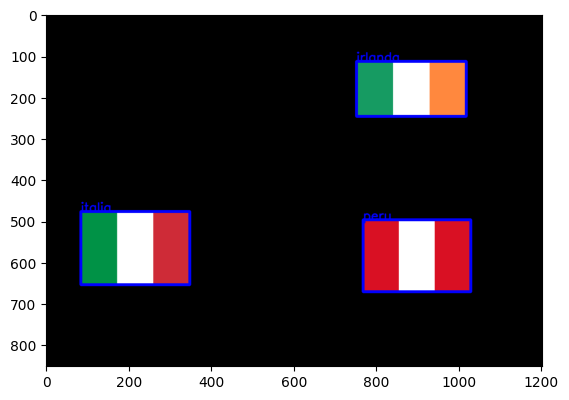

In [ ]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
# img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


